Perform the following operations using Python on Hepatitis dataset.  
q. Data cleaning(Remove NA, ?, Negative values etc.)  
r. Error correcting(Outlier detection and removal)  
s. Data transformation  
t. Build Data model using regression and Naïve Bayes methods for prediction class 
DIE, LIVE and compare accuracy Prediction. 

pip install pandas numpy scikit-learn matplotlib seaborn



Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 5 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              80 non-null     int64  
 1   sex              80 non-null     object 
 2   steroid          80 non-null     float64
 3   antivirals       80 non-null     bool   
 4   fatigue          80 non-null     float64
 5   malaise          80 non-null     float64
 6   anorexia         80 non-null     float64
 7   liver_big        80 non-null     float64
 8   liver_firm       80 non-null     float64
 9   spleen_palpable  80 non-null     float64
 10  spiders          80 non-null     float64
 11  ascites          80 non-null     float64
 12  varices          80 non-null     float64
 13  bilirubin        80 non-null     float64
 14  alk_phosphate    80 non-null     float64
 15  sgot             80 non-null     float64
 16  albumin          80 non-null     float64
 17  pr

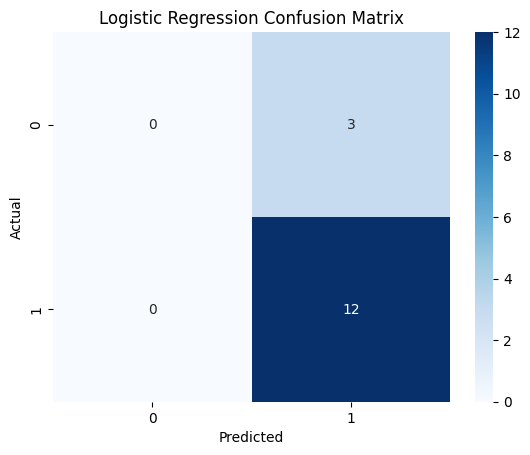

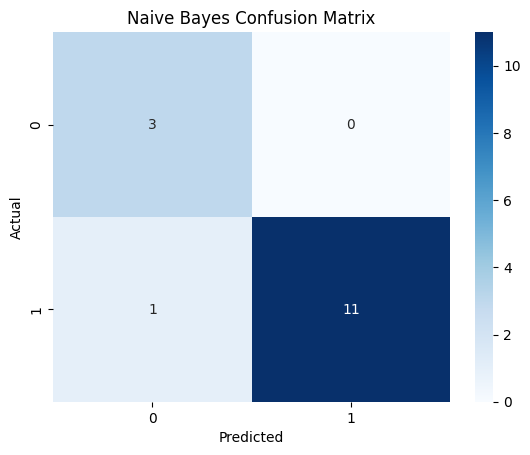

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Load dataset
df = pd.read_csv('/Users/akshay/Desktop/dsbda_practical/newdata/hepatitis_csv.csv')

# ---------------------------------------
# (q) Data Cleaning
# ---------------------------------------

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert appropriate columns to numeric
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove negative values
for col in numeric_cols:
    df[col] = df[col].map(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Drop rows with missing values
df_cleaned = df.dropna()

print("\nCleaned Data Info:")
print(df_cleaned.info())

# ---------------------------------------
# (r) Error Correcting - Outlier Removal using Z-score
# ---------------------------------------

z_scores = np.abs(stats.zscore(df_cleaned[numeric_cols]))
df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]

print(f"\nData shape after removing outliers: {df_no_outliers.shape}")

# ---------------------------------------
# (s) Data Transformation
# ---------------------------------------

# Convert 'sex' to numeric
df_transformed = df_no_outliers.copy()
df_transformed['sex'] = df_transformed['sex'].map({'male': 1, 'female': 0})

# Convert 'class' to numeric (target)
df_transformed['class'] = df_transformed['class'].map({'live': 1, 'die': 0})

# Normalize numeric columns
scaler = MinMaxScaler()
df_transformed[numeric_cols] = scaler.fit_transform(df_transformed[numeric_cols])

print("\nTransformed Data Preview:")
print(df_transformed.head())

# ---------------------------------------
# (t) Modeling - Logistic Regression & Naive Bayes
# ---------------------------------------

# Define features and target
X = df_transformed.drop('class', axis=1)
y = df_transformed['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Accuracy
log_acc = accuracy_score(y_test, log_preds)
nb_acc = accuracy_score(y_test, nb_preds)

print("\nLogistic Regression Accuracy:", round(log_acc, 4))
print(" Naive Bayes Accuracy:", round(nb_acc, 4))

# Classification Reports
print("\n Logistic Regression Report:\n", classification_report(y_test, log_preds, target_names=['Die', 'Live'], zero_division=0))
print("\nNaive Bayes Report:\n", classification_report(y_test, nb_preds, target_names=['Die', 'Live'], zero_division=0))

# Optional: Confusion Matrix Plot
def plot_conf_matrix(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, log_preds, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, nb_preds, "Naive Bayes Confusion Matrix")
